<a id='start'></a>
# Lezione 2 - Esercizi

#### Utilizziamo ed esploariamo un dataset di Pandas.

Provate a svolgere i seguenti esercizi: <br>
1) [Plottare grafici per età di uomini e donne](#section1)<a href='#section1'></a> <br>
2) [Rappresentare i morti/sopravvissuti per ogni classe](#section2)<a href='#section2'></a><br>
3) [Creare un grafico a torta dei soldi spesi per i biglietti](#section3)<a href='#section3'></a> <br>
4) [Fitting di un istogramma](#section4)<a href='#section4'></a> <br>
5) [Correzione tra prezzo biglietto ed età?](#section5)<a href='#section5'></a> <br>
6) [Correlazioni in SerieA?](#section6)<a href='#section6'></a> <br>

Importiamo il dataset del Titanic

In [6]:
import pandas as pd

titanic = pd.read_csv("data/train_dataset_titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id='section1'></a>
## Plottare grafici per età di uomini e donne

Effettuare dei calcoli sulle età degli uomini e delle donne.<br>
Per risolvere l'esercizio:
1. Calcolare le principali statistiche delle serie delle età delle donne e degli uomini
2. Rappresentare le età degli uomini e delle donne su due distinti istrogrammi, per ognuno dei due istogrammi provare a fittare i dati con una fistribuzione normale e disegnare la funzione di fit calcolata.

Per prima cosa creo le divisioni per donne e uomini

In [7]:
donne = titanic.loc[titanic['Sex'] == 'female']
uomini = titanic.loc[titanic['Sex'] == 'male']

In [8]:
print(r"Età media uomini: {}, mediana: {}, std: {}".format(round(uomini['Age'].mean(),2), round(uomini['Age'].median(),2), round(uomini['Age'].std(),2)))
print(r"Età media donne: {}, mediana: {}, std: {}".format(round(donne['Age'].mean(),2), round(donne['Age'].median(),2), round(donne['Age'].std(),2)))

Età media uomini: 30.73, mediana: 29.0, std: 14.68
Età media donne: 27.92, mediana: 27.0, std: 14.11


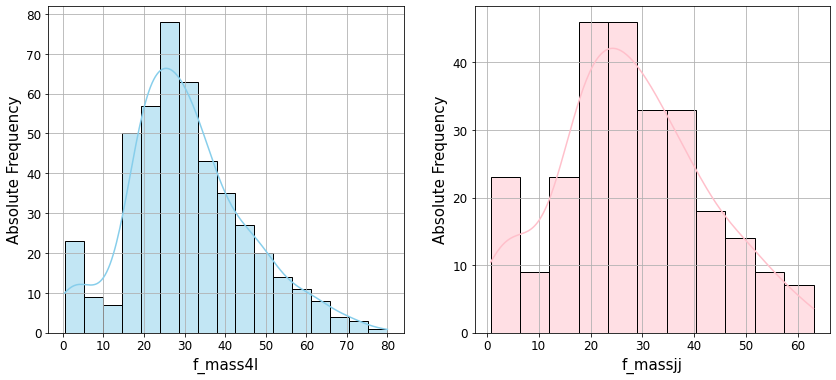

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.histplot(uomini['Age'], color = "skyblue", kde = True)
plt.xlabel("f_mass4l", size = 15)
plt.ylabel("Absolute Frequency", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(donne['Age'], color = "pink", kde = True)
plt.xlabel("f_massjj", size = 15)
plt.ylabel("Absolute Frequency", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.grid()

Calcoliamo ora il fit Gaussiano di entrambe le distribuzioni e disegniamolo. Prima di farlo però dobbiamo rimuovere i missing values, in questo caso vedendo le distribuzioni inseriamo il valore mediano

In [10]:
uomini['Age'] = uomini['Age'].fillna(value = uomini['Age'].median())
donne['Age'] = donne['Age'].fillna(value = donne['Age'].median())

/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

mean_uomini, std_uomini = norm.fit(np.array(uomini['Age']))
mean_donne, std_donne = norm.fit(np.array(donne['Age']))

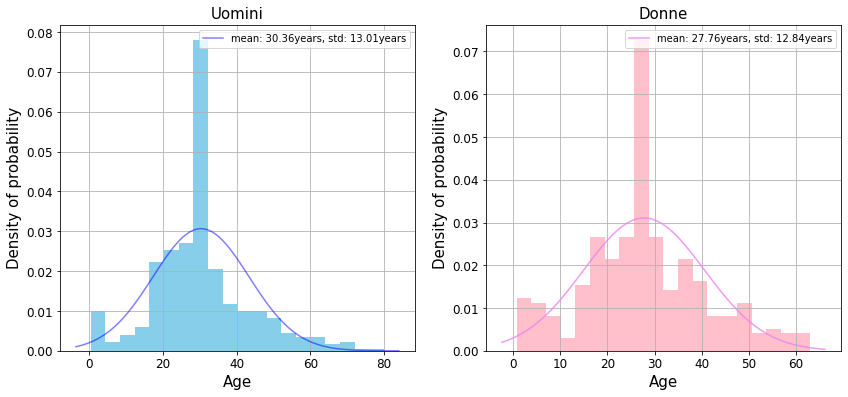

In [12]:
fig = plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.hist(np.array(uomini['Age']), bins=20, density=True, color = "skyblue")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_uomini, std_uomini)
plt.plot(x, y, color = "blue", alpha = 0.5, label = "mean: {}years, std: {}years".format(round(mean_uomini,2),round(std_uomini,2)))
plt.xlabel("Age", size = 15)
plt.ylabel("Density of probability", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title("Uomini", size = 15)
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.hist(np.array(donne['Age']), bins=20, density=True, color = "pink")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_donne, std_donne)
plt.plot(x, y, color = "violet", alpha = 0.8, label = "mean: {}years, std: {}years".format(round(mean_donne,2),round(std_donne,2)))
plt.xlabel("Age", size = 15)
plt.ylabel("Density of probability", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title("Donne", size = 15)
plt.legend()
plt.grid()

<a id='section2'></a>
## Rappresentare i morti/sopravvissuti per ogni classe

Rappresentare in un grafico a pila il numero di morti e sopravvissuti per ogni classe di servizio del viaggio (prima classe, seconda classe, terza classe).

In [13]:
survived = titanic.groupby('Pclass').sum()['Survived'].reset_index()

In [14]:
survived

,Pclass,Survived
0,1,136
1,2,87
2,3,119


<AxesSubplot:xlabel='Survived', ylabel='count'>

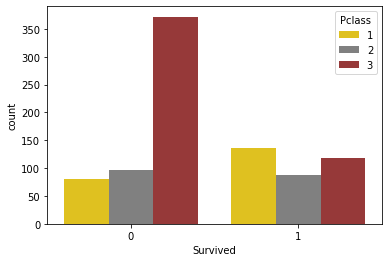

In [43]:
sns.countplot(x="Survived", hue="Pclass", data=titanic, palette = ['gold', 'grey', 'brown'])

<a id='section3'></a>
## Creare un grafico a torta dei soldi spesi per i biglietti

Creare un grafico a torta che rappresenti il costo complessivo dei biglietti degli uomini e delle donne.

([<matplotlib.patches.Wedge at 0x7f9ccf1bc5d0>,
 [Text(0.04787090895111664, 1.1490032097762801, 'Uomini'),
  Text(-0.047871016528561405, -1.1490032052942771, 'Donne')],
 [Text(0.02289478254183839, 0.5495232742408295, '13967.0'),
  Text(-0.02289483399192067, -0.5495232720972629, '14727.0')])

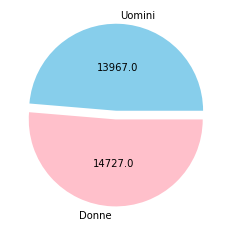

In [15]:
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

labels = ['Uomini', 'Donne']
soldi = titanic.groupby('Sex').sum()['Fare'].reset_index()
sizes = soldi['Fare']

plt.pie(x=soldi['Fare'], autopct=absolute_value, explode=[0.05]*2, labels=labels, 
        pctdistance=0.5, colors = ["skyblue","pink"])

<a id='section4'></a>
## Fitting di un istogramma 

Scaricate il file `data1.txt` e realizzate un programma che legga e fitti i dati in esso contenuti. Il fitting potrà essere effettuato con una funzione gaussiana. Quindi fittate i dati e mostrate i risultati del fitting. 

Fare lo stesso con i dati nel file `data2.txt`.
In questo caso il fitting dovrà avvenire con una funzione risultato della composizione di più funzioni (una per il background e una per i segnali).

In [16]:
data1 = pd.read_csv('data/data1.txt', sep = "\t", header = None)
data2 = pd.read_csv('data/data2.txt', sep = "\t", header = None)

In [17]:
data2

,0
0,199.8350
1,15.1826
2,28.0203
3,170.9320
4,22.3525
...,...
105495,170.8950
105496,165.9640
105497,170.7970
105498,164.6150


In [18]:
data1 = np.array(data1)
data2 = np.array(data2)

Proviamo prima a disegnare i dati, scegliamo quindi una soglia per cui è considerato rumore e dividiamo il dataframe in due, una volta che è stato diviso fittiamo le due funzioni separatamente e poi proviamo anche a disegnare la somma delle due

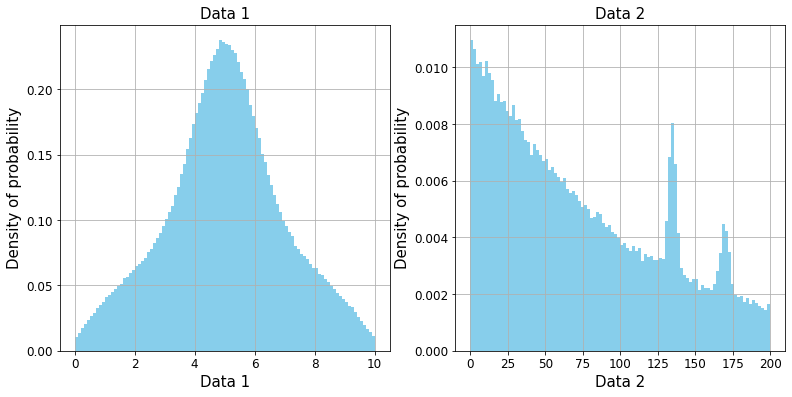

In [19]:
fig = plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
plt.hist(np.array(data1), bins=100, density=True, color = "skyblue")
xmin, xmax = plt.xlim()
plt.xlabel("Data 1", size = 15)
plt.ylabel("Density of probability", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title("Data 1", size = 15)
plt.grid()

plt.subplot(1,2,2)
plt.hist(np.array(data2), bins=100, density=True, color = "skyblue")
xmin, xmax = plt.xlim()
plt.xlabel("Data 2", size = 15)
plt.ylabel("Density of probability", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title("Data 2", size = 15)
plt.grid()

In [20]:
mean_1, std_1 = norm.fit(data1)

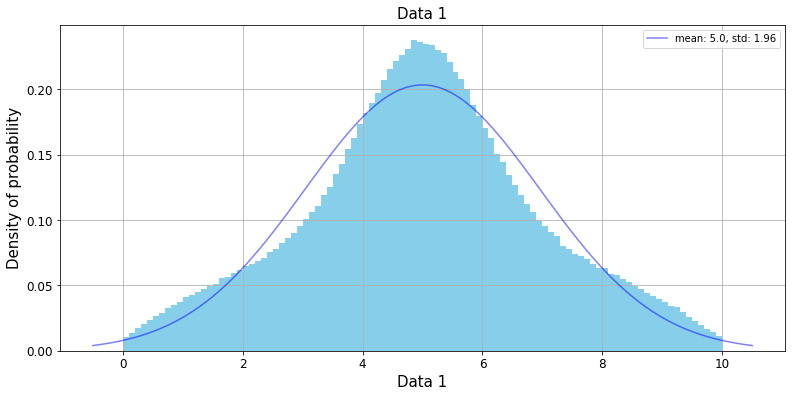

In [21]:
fig = plt.figure(figsize = (13,6))
plt.hist(np.array(data1), bins=100, density=True, color = "skyblue")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_1, std_1)
plt.plot(x, y, color = "blue", alpha = 0.5, label = "mean: {}, std: {}".format(round(mean_1,2),round(std_1,2)))
plt.xlabel("Data 1", size = 15)
plt.ylabel("Density of probability", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title("Data 1", size = 15)
plt.legend()
plt.grid()

Proviamo a costruire il fit "a mano" partendo da una definzione di una funzione di fit e usando il metodo `curve_fit` (ci verrà comodo per l'altra parte dell'esercizio!). Posso usare la funzione norm di scipy.stats

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x_data1 = np.linspace(0,10,len(data1))
popt, pcov = curve_fit(func, x_data1, data1)

In [ ]:
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

Così facendo ci è anche possibile creare una funzione di fit sull'istogramma non normalizzato (aggiungendo un fattore di scala K alla funzione della gaussiana).

Proviamo ora a fittare i dati nel scondo file, usando una funziona di fit che è la composizione di background e segnali.

<a id='section5'></a>
## Correlazione tra prezzo biglietto ed età? 

Verificare se esiste una correlazione tra l'età del passeggero e il prezzo pagato per il biglietto. <br>
La correlezione può essere vista ad occhio facendo un grafico scatter o calcolata con un indice di correlazione.

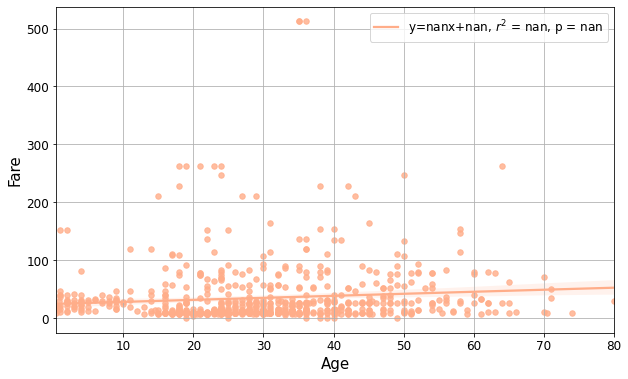

In [35]:
from scipy import stats

fig= plt.figure(figsize = (10,6))

slope, intercept, r_value, p_value, std_err = stats.linregress(titanic['Age'], y = titanic['Fare'])
sns.regplot(x = titanic['Age'], y = titanic['Fare'], scatter_kws={"s": 30}, ci = 95, color = "#FFAD89", order = 1,
            line_kws={'label': r"y={0:.2f}x+{1:.2f}, $r^2$ = {2:.2f}, p = {3:.2f}".format(slope, intercept, r_value, p_value)})

plt.xticks(size = 12)
plt.yticks(size = 12)

plt.xlabel("Age", size = 15)
plt.ylabel("Fare", size = 15)

plt.grid()
plt.legend(fontsize=12)

<a id='section6'></a>
## Correlazioni in SerieA? 

Riprendiamo il dataset sulla classifica di Serie A e vediamo se il numero di gol e le partite vinte, pareggiate e perse (in casa e fuori casa) correlano con il punteggio ottenuto in classifica.

In [23]:
classifica_serie_a = pd.read_html(io="http://www.legaseriea.it/it/serie-a/classifica", skiprows=1, header=0)
serie_a = classifica_serie_a[0]

In [24]:
serie_a

,SQUADRE,PUNTI,G,V,N,P,G.1,V.1,N.1,P.1,G.2,V.2,N.2,P.2,F,S
0,1 Inter,62,26,19,5,2,13,11,1,1,13,8,4,1,63,25
1,2 Milan,56,26,17,5,4,13,6,4,3,13,11,1,1,50,30
2,3 Juventus,52,25,15,7,3,13,10,2,1,12,5,5,2,51,21
3,4 Roma,50,26,15,5,6,14,10,3,1,12,5,2,5,51,38
4,5 Atalanta,49,26,14,7,5,13,7,3,3,13,7,4,2,60,33
5,6 Napoli,47,25,15,2,8,13,9,1,3,12,6,1,5,55,29
6,7 Lazio,43,25,13,4,8,12,7,2,3,13,6,2,5,39,35
7,8 Hellas Verona,38,26,10,8,8,13,6,3,4,13,4,5,4,34,29
8,9 Sassuolo,36,25,9,9,7,12,3,6,3,13,6,3,4,40,39
9,10 Sampdoria,32,26,9,5,12,13,5,2,6,13,4,3,6,36,39


Creo la colonna differenza reti

In [29]:
serie_a['diff_reti'] = serie_a['F'] - serie_a['S']

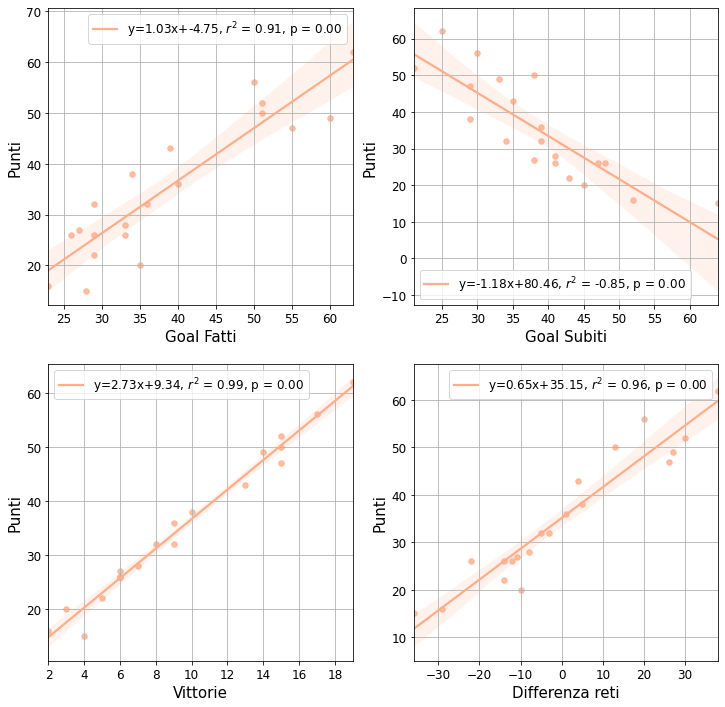

In [31]:
fig= plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
slope, intercept, r_value, p_value, std_err = stats.linregress(serie_a['F'], y = serie_a['PUNTI'])
sns.regplot(x = serie_a['F'], y = serie_a['PUNTI'], scatter_kws={"s": 30}, ci = 95, color = "#FFAD89", order = 1,
            line_kws={'label': r"y={0:.2f}x+{1:.2f}, $r^2$ = {2:.2f}, p = {3:.2f}".format(slope, intercept, r_value, p_value)})
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("Goal Fatti", size = 15)
plt.ylabel("Punti", size = 15)
plt.grid()
plt.legend(fontsize=12)


plt.subplot(2,2,2)
slope, intercept, r_value, p_value, std_err = stats.linregress(serie_a['S'], y = serie_a['PUNTI'])
sns.regplot(x = serie_a['S'], y = serie_a['PUNTI'], scatter_kws={"s": 30}, ci = 95, color = "#FFAD89", order = 1,
            line_kws={'label': r"y={0:.2f}x+{1:.2f}, $r^2$ = {2:.2f}, p = {3:.2f}".format(slope, intercept, r_value, p_value)})
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("Goal Subiti", size = 15)
plt.ylabel("Punti", size = 15)
plt.grid()
plt.legend(fontsize=12)


plt.subplot(2,2,3)
slope, intercept, r_value, p_value, std_err = stats.linregress(serie_a['V'], y = serie_a['PUNTI'])
sns.regplot(x = serie_a['V'], y = serie_a['PUNTI'], scatter_kws={"s": 30}, ci = 95, color = "#FFAD89", order = 1,
            line_kws={'label': r"y={0:.2f}x+{1:.2f}, $r^2$ = {2:.2f}, p = {3:.2f}".format(slope, intercept, r_value, p_value)})
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("Vittorie", size = 15)
plt.ylabel("Punti", size = 15)
plt.grid()
plt.legend(fontsize=12)

plt.subplot(2,2,4)
slope, intercept, r_value, p_value, std_err = stats.linregress(serie_a['diff_reti'], y = serie_a['PUNTI'])
sns.regplot(x = serie_a['diff_reti'], y = serie_a['PUNTI'], scatter_kws={"s": 30}, ci = 95, color = "#FFAD89", order = 1,
            line_kws={'label': r"y={0:.2f}x+{1:.2f}, $r^2$ = {2:.2f}, p = {3:.2f}".format(slope, intercept, r_value, p_value)})
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("Differenza reti", size = 15)
plt.ylabel("Punti", size = 15)
plt.grid()
plt.legend(fontsize=12)

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>